# Burrows - Wheeler Transform & Inverse Transform


* Used for pattern matching and text compression
* Text compression allows for storage of long genome sequences using lesser   memory 
* This is done using run-length coding

## BWT : Theory

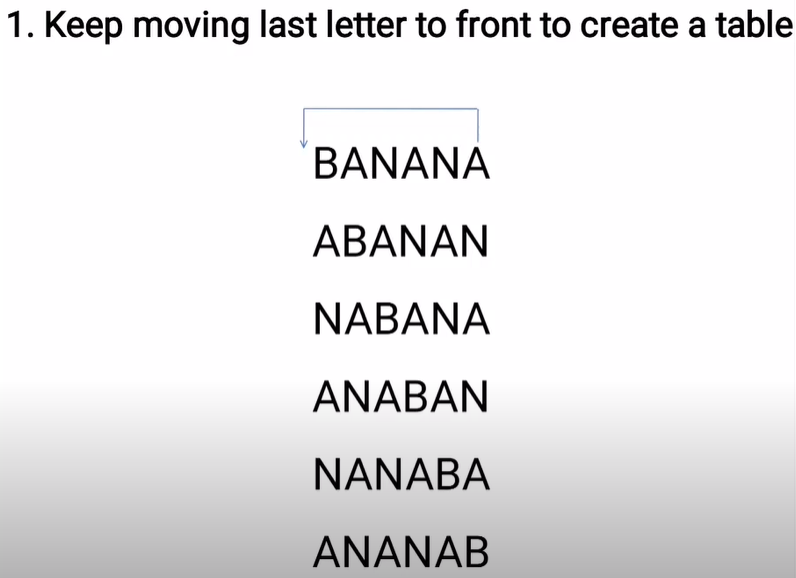

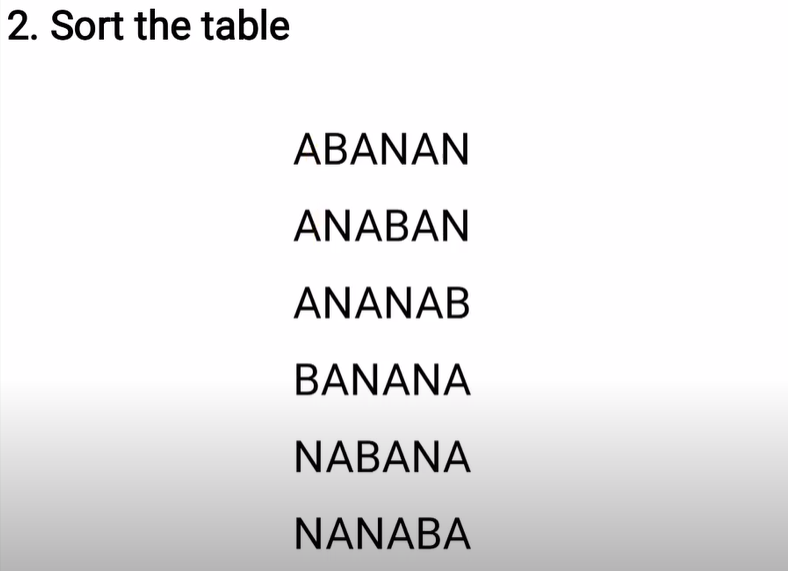

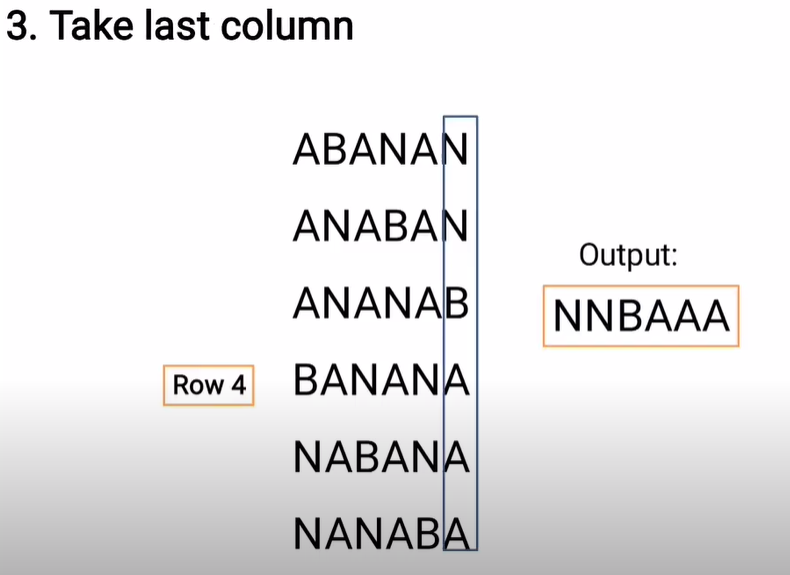

* Last column of the BWT matrix holds the BWT transform of the string
* It has more runs than the original string
* Row of the BWT matrix holding the original string should be noted

*****************

## BWT : Code

In [1]:
var ms = require('mathjs')

In [2]:
// function for BWT that takes the input string as the parameter
function BWT(given){

var words_list = []

for (var i = 0; i < given.length; i++){
  // word = last letter + first to last-1 letter
  var word = given.slice(-1) + given.slice(0, -1);
    
  // assigning given to word so as to perform cyclic rotation 
  given = word; 
    
  // adding each word to words_list
  words_list.push(word)
}

// sorting the words list
var sort = words_list.sort()

// empty string for containing bwt string
bwtstring = ''
for (var i = 0; i < given.length; i++){
    
    // taking each word from the sorted words list
    var sword = sort[i];
    // taking the last element 
    var laste = sword.slice(-1)
    // appending to bwtstring
    bwtstring += laste

}
// finding which index of the words_list contains the given string
console.log(bwtstring)
index = words_list.indexOf(given) 
console.log("Index of original string:", index)
}

In [3]:
var given = 'banana'
BWT(given)

nnbaaa
Index of original string: 3


******************************

## Inverse BWT : Theory

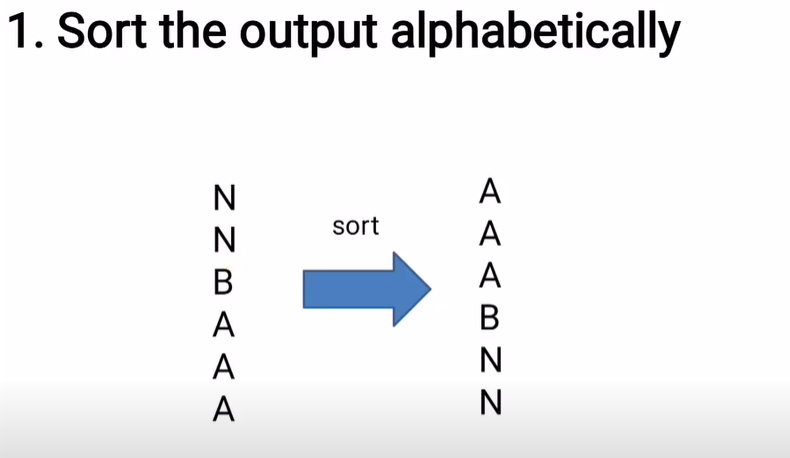

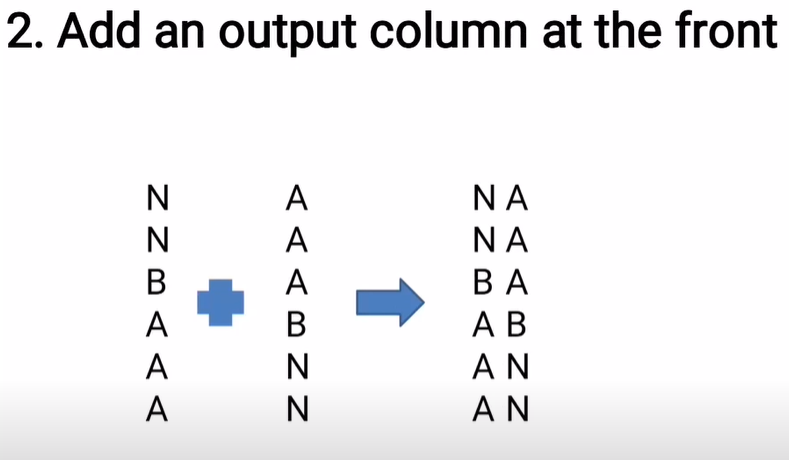

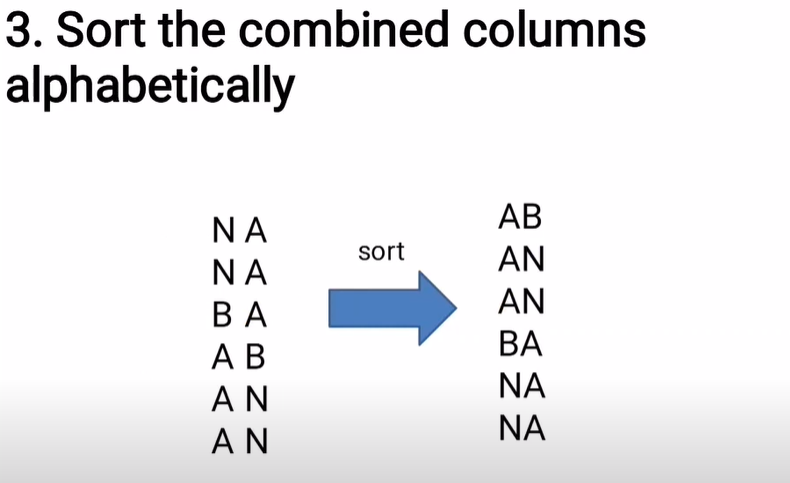

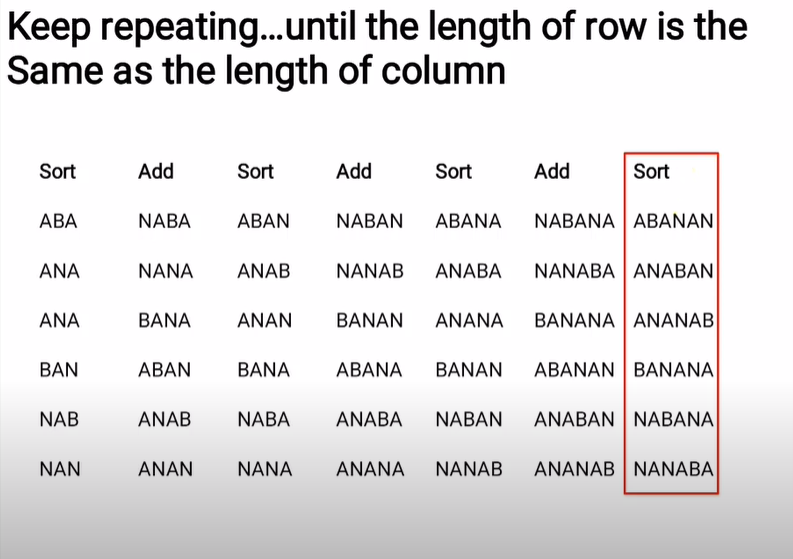

* The original string can be obtained by extracting the row number noted while doing BWT.

************************

## Inverse BWT : Code

In [4]:
// function for inverting BWT that takes a BWT string and index as an input
function invBWT(bwt_string, index){
    
// splitting BWT string into an array
var last = bwt_string.split('')

// reshaping it to be a column
var lastc = ms.reshape(last, [bwt_string.length, 1])

// assigning words lastc 
var words = lastc.slice()

for (var i = 0; i < bwt_string.length; i++){
    // sorting words lexicographically 
    var words_sorted = words.slice().sort()
    // concatenating given bwt string with sorted words
    words = ms.concat(lastc, words_sorted, 1)
}

// extracting the given index of words_sorted
var splits = words_sorted[index]
// joining together to make a string
out = splits.join('')
console.log(out)

}

In [5]:
invBWT(bwtstring, index)

banana


In [6]:
//Checking if output of inverse BWT is equal to given string
out == given

true